<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Aproksimacija</b></font>
<br><br>
<font size="4">
[izr. prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Avgust 2017</font>
</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Uvod" data-toc-modified-id="Uvod-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></div><div class="lev1 toc-item"><a href="#Metoda-najmanjših-kvadratov-za-linearno-funkcijo" data-toc-modified-id="Metoda-najmanjših-kvadratov-za-linearno-funkcijo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Metoda najmanjših kvadratov za linearno funkcijo</a></div><div class="lev2 toc-item"><a href="#Opomba-na-uporabo-psevdo-inverzne-matrike" data-toc-modified-id="Opomba-na-uporabo-psevdo-inverzne-matrike-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Opomba na uporabo psevdo inverzne matrike</a></div><div class="lev1 toc-item"><a href="#Metoda-najmanjših-kvadratov-za-poljubni-polinom" data-toc-modified-id="Metoda-najmanjših-kvadratov-za-poljubni-polinom-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metoda najmanjših kvadratov za poljubni polinom</a></div><div class="lev2 toc-item"><a href="#Numerični-primer" data-toc-modified-id="Numerični-primer-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerični primer</a></div><div class="lev2 toc-item"><a href="#Uporaba-numpy-za-aproksimacjo-s-polinomom" data-toc-modified-id="Uporaba-numpy-za-aproksimacjo-s-polinomom-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Uporaba <code>numpy</code> za aproksimacjo s polinomom</a></div><div class="lev1 toc-item"><a href="#Aproksimacija-s-poljubno-funkcijo" data-toc-modified-id="Aproksimacija-s-poljubno-funkcijo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aproksimacija s poljubno funkcijo</a></div><div class="lev2 toc-item"><a href="#Primer:-aproksimacija-s-harmonsko-funkcijo" data-toc-modified-id="Primer:-aproksimacija-s-harmonsko-funkcijo-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Primer: aproksimacija s harmonsko funkcijo</a></div><div class="lev1 toc-item"><a href="#Aproksimacija-z-zlepki-in-uporabo-SciPy" data-toc-modified-id="Aproksimacija-z-zlepki-in-uporabo-SciPy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aproksimacija z zlepki in uporabo <code>SciPy</code></a></div><div class="lev1 toc-item"><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1 toc-item"><a href="#Dodatno" data-toc-modified-id="Dodatno-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dodatno</a></div>

# Uvod

V strojniški praksi se pogosto srečamo s tabelo podatkov, ki na primer izvirajo iz meritev in so lahko obremenjeni z merilnimi ali numeričnimi napakami.

Oglejmo si primer meritve (linearne) vzmeti ($x$ je raztezek, $y$ je pomerjene sila):

In [1]:
import numpy as np

x = np.array([0.1,  1.1, 2.05, 3.2, 3.9  ])
y = np.array([0.2, 18.1, 44.3, 75.5, 105.6])

Poglejmo si podatke na slik, najprej uvozimo potrebne pakete:

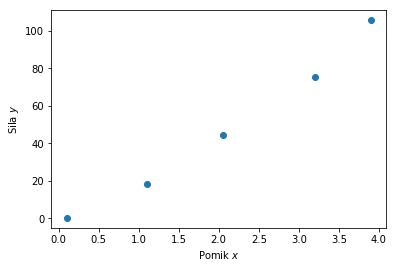

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, 'o');
plt.xlabel('Pomik $x$')
plt.ylabel('Sila $y$');

Za konkreten primer bi bilo, glede na poznavanje fizikalnega ozadja linearne vzmeti, primerno da bi meritve poskušali popisati z linearno funkcijo:
$$f(x) = a_0\,x+ a_1$$

Poznamo tabelo podatkov $x_i, y_i$; teh je več, kot jih potrebujemo za določitev dveh konstant $a_0$ in $a_1$, zato imamo torej predoločen sistem linearnih enačb. Iz tega razloga moramo najti ustrezni konstanti $a_0$ in $a_1$, da se bo funkcija $f(x)$ v znanih točkah $x_i$ *najbolje* ujemala z $y_i$.

Najprej torej potrebujemo kriterij za *najboljše* ujemanje. 

Za vrednosti iz tabele $x_i, y_i$ bi lahko iskali takšni konstanti $a_0$ in $a_1$, kjer bi bila vsota absolutne vrednosti odstopkov $S$ najmanjša:

$$P(a_0, a_1) = \sum_i |y_i - (a_0\,x_i+a_1)|.$$

Vendar funkcija $P(a_0, a_1)$ ni zvezno odvedljiva in zato uporabimo **metodo najmanjših kvadratov**:

$$S(a_0, a_1) = \sum_i \left(y_i - (a_0\,x_i+a_1)\right)^2.$$

Takšna funkcija $S(a_0, a_1)$ je zvezna in zvezno odvedljiva. S parcialnim odvajanjem po parametrih $a_0$ in $a_1$ lahko najdemo stacionarno točko (parcialni odvod je enak 0). Postopek si bomo za linearno funkcijo pogledali v naslednjem poglavju.

# Metoda najmanjših kvadratov za linearno funkcijo

Poiskati moramo konstanti $a_0$, $a_1$, da bo vsota kvadratov razlik med funkcijo in tabelirano vrednostjo ($x_i, y_i$, kjer $i=0,1,\dots, n-1$ in je $n$ število tabeliranih podatkov):

$$S(a_0, a_1) = \sum_{i=0}^{n-1} \left(y_i - (a_0\,x_i+a_1)\right)^2$$

najmanjša. Vrednost bo najmanjša v stacionarni točki, ki jo določimo s parcialnim odvodom po parametrih $a_0$ in $a_1$.

Najprej izvedemo parcialni odvod po parametru $a_0$:

$$\frac{\partial S(a_0, a_1)}{\partial a_0} = 2\,\sum_{i=0}^{n-1} \left(y_i - a_0\,x_i-a_1\right)\,(-x_i)$$

izraz uredimo:

$$\frac{\partial S(a_0, a_1)}{\partial a_0} =-2\left(\sum_{i=0}^{n-1} y_i\,x_i -a_0\,\sum_{i=0}^{n-1} x_i^2- a_1\,\sum_{i=0}^{n-1} x_i\right)$$

Podobno postopamo še za $a_1$:

$$\frac{\partial S(a_0, a_1)}{\partial a_1} = 2\,\sum_{i=0}^{n-1} \left(y_i  - a_0\,x_i- a_1\right)\,(-1)$$

$$\frac{\partial S(a_0, a_1)}{\partial a_1} = -2\left(\sum_{i=0}^{n-1} y_i -a_0\,\sum_{i=0}^{n-1} x_i- a_1\,\sum_{i=0}^{n-1}1\right)$$

Ker velja $\partial S(a_0, a_1)/\partial a_0=0$ in $\partial S(a_0, a_1)/\partial a_1=0$ iz zgornjih izrazov izpeljemo:

$$a_0\,\sum_i^n x_i^2 + a_1\,\sum_i^n x_i=\sum_i^n y_i\,x_i$$

in

$$a_0\,\sum_i^n x_i+ a_1\,n=\sum_i^n y_i.$$

Dobili smo sistem dveh linearnih enačb za neznanki $a_0$ in $a_1$, ki ga znamo rešiti in se imenuje normalni sistem (število enačb je enako številu naznank).

Zapišimo normalni sistem v matrični obliki:

In [3]:
A = [[np.sum(x**2), np.sum(x)], # matrika koeficientov
     [np.sum(x), len(x)]]
b = [np.dot(y,x), np.sum(y)]    # vektor konstant
A = np.asarray(A)
b = np.asarray(b)
print('A:', A)
print('b:', b)

A: [[ 30.8725  10.35  ]
 [ 10.35     5.    ]]
b: [ 764.185  243.7  ]


Sedaj moramo rešiti linearni sistem:

$$\mathbf{A}\,\mathbf{a}=\mathbf{b},$$

Opomba, tukaj smo vektor neznak zapisali kot $\mathbf{a}=(a_0, a_1)$.

Sistem rešimo:

In [4]:
a0, a1 = np.linalg.solve(A, b)
a0, a1

(27.490050804403033, -8.1644051651142853)

Preverimo še število pogojenosti:

In [5]:
np.linalg.cond(A)

25.200713508702421

Sedaj si bomo pogledali še rezultat. Najprej pripravimo sliko, katera bo vsebovala tudi informacijo o vsoti kvadratov odstopanja $f(x_i)$ od tabeliranih vrednosti $y_i$.

In [6]:
def slika(naklon=a0, premik=a1):
    d=1
    def linearna_f(x, a0, a1):
        return a0*x+a1
    def S(x, y, f):
        return np.sum(np.power(y-f,2))
    plt.plot(x,y,'.', label='Tabela podatkov')
    linearna_f1 = linearna_f(x, naklon, premik)
    linearna_f1_MNK = linearna_f(x, a0, a1)
    plt.plot(x, linearna_f1, '-', label='Izbrani parametri')
    plt.plot(x, linearna_f1_MNK, '-', label='Metoda najmanjših kvadratov')
    napaka = S(x, y, linearna_f(x, naklon, premik))
    sprememba_napake_v_smeri_a0 = (S(x, y, linearna_f(x, naklon+d, premik))-napaka)/d
    sprememba_napake_v_smeri_a1 = (S(x, y, linearna_f(x, naklon, premik+d))-napaka)/d
    title = f'S: {napaka:g}, \
            $\Delta S/\Delta a_0$: {sprememba_napake_v_smeri_a0:g}, \
            $\Delta S/\Delta a_1$: {sprememba_napake_v_smeri_a1:g}'
    plt.title(title)
    plt.legend()
    plt.ylim(-10,110)
    plt.show()

In [7]:
from ipywidgets import interact
interact(slika, naklon=(0, 50, 2), premik=(-10, 10, 1));

## Opomba na uporabo psevdo inverzne matrike

Do podobnega rezultata lahko pridemo z uporabo psevdo inverzne matrike. Iščemo $y(x)=a_0\,x+a_1$ in nastavimo predoločen sistem $\mathbf{A}\,\mathbf{a}=\mathbf{y}$, kjer je matrika koeficientov $\mathbf{A}$ definirana glede na vrednosti $x_i$ ($i=0,1,\dots,n-1$):

In [8]:
A=np.array([x, np.ones_like(x)]).T
A

array([[ 0.1 ,  1.  ],
       [ 1.1 ,  1.  ],
       [ 2.05,  1.  ],
       [ 3.2 ,  1.  ],
       [ 3.9 ,  1.  ]])

Vektor konstant smo tipično oznalili z $\mathbf{b}$, vendar je tukaj to kar vektor vrednosti $y_i$ ($i=0,1,2,\dots,n-1$):

In [9]:
y

array([   0.2,   18.1,   44.3,   75.5,  105.6])

Vektor konstant $\mathbf{a}$ določimo z uporabo psevdo inverzne matrike:

$$\mathbf{a}=\mathbf{A}^{+}\,\mathbf{y}$$

In [10]:
np.linalg.pinv(A).dot(y)

array([ 27.4900508 ,  -8.16440517])

# Metoda najmanjših kvadratov za poljubni polinom

Linearno aproksimacijo, predstavljeno zgoraj, bomo posplošili za poljubni polinom stopnje $m$:

$$f(a_0,a_1,\dots,a_{m}, x) = \sum_{v=0}^{m}a_v\,\underbrace{x^{m-v}}_{f_v(x)},$$

kjer $f_v(x)$ ($v=0,1,2,\dots,m$) imenujemo bazna funkcija.

Tabela podatkov naj bo definirana z $x_i, y_i$, kjer je $i=0,1,2,\dots,n-1$. 

Opomba: zaradi kompaktnosti zapisa, bom o konstante $a$ zapisali v vektorski obliki $\mathbf{a}=[a_0, a_1,\dots,a_m]$.

Uporabimo metodo najmanjši kvadratov:

$$S(\mathbf{a}) = \sum_{i=0}^{n-1} \left(y_i - f(\mathbf{a}, x_i)\right)^2.$$

Potreben pogoj za nastop ekstrema funkcije $m+1$ neodvisnih spremenljivk je, da najdemo stacionarno točko za vsak $a_v$, išemo torej $S(\mathbf{a})/\partial a_v=0$.

Najprej določimo parcialni odvod za izbrani $a_v$:

$$\frac{\partial S(\mathbf{a})}{\partial a_v} = - 2\,\sum_{i=0}^{n-1} \left(\left(y_i - f(\mathbf{a}, x_i)\right)\,x_i^{m-v}\right)$$

Ker je parcialni odvod v stacionarni točki enak 0, zgornji izraz preolikujemo:

$$\sum_{i=0}^{n-1} f(\mathbf{a}, x_i)\,x_i^{m-v}=\sum_{i=0}^{n-1} y_i\,x_i^{m-v}$$

Upoštevajmo izraz za $f(\mathbf{a}, x_i)$; ker pa je indeks $v$ že zaseden, uporabomo namesto njega indeks $s$:

$$\sum_{i=0}^{n-1} \left(
\sum_{s=0}^{m}a_s\,x_i^{m-s}
\right)\,x_i^{m-v}=\sum_{i=0}^{n-1} y_i\,x_i^{m-v}$$


Izraz uredimo:

$$\sum_{i=0}^{n-1} \sum_{s=0}^m a_s\,x_i^{2m-s-v}=\sum_{i=0}^{n-1} y_i\,x_i^{m-v}$$

in zamenjamo vrstni red seštevanja ter izpeljmo:

$$\sum_{s=0}^m \left(a_s \sum_{i=0}^{n-1} \,x_i^{2m-s-v}\right)=\sum_{i=0}^{n-1} y_i\,x_i^{m-v}.$$

Izpeljali smo enačbo $v$ sistema $m+1$ linearnih enačb:

$$\mathbf{A}\,{\mathbf{a}}=\mathbf{b}$$

Element $A_{v,s}$ matrike koeficientov je:

$$A_{v,s}= \sum_{i=0}^{n-1} x_i^{2m-v-s},$$

in element vektorja konstant:

$$b_{v}= \sum_{i=0}^{n-1} y_i\,x_i^{m-v}$$

## Numerični primer

Uporabimo podatke iz prve naloge in poskusimo aproksimirati s polinomom 2. stopnje ($m=2$). 

Tabela podatkov je:

In [11]:
x

array([ 0.1 ,  1.1 ,  2.05,  3.2 ,  3.9 ])

In [12]:
y

array([   0.2,   18.1,   44.3,   75.5,  105.6])

Izračunajmo matriko koeficientov:

$$A_{v,s}= \sum_{i=0}^{n-1} x_i^{2m-v-s}$$

In [13]:
m = 2 #stopnja
A = np.zeros((m+1,m+1))
for v in range(m+1):
    for s in range(m+1):
        A[v,s] = np.sum(x**(2*m-v-s))
A

array([[ 355.32690625,  102.034125  ,   30.8725    ],
       [ 102.034125  ,   30.8725    ,   10.35      ],
       [  30.8725    ,   10.35      ,    5.        ]])

Izračunajmo še vektor konstant:

$$b_{v}= \sum_{i=0}^{n-1} y_i\,x_i^{m-v}$$

In [14]:
b = np.zeros(m+1)
for v in range(m+1):
    b[v] = np.dot(y,x**(m-v))
b

array([ 2587.36975,   764.185  ,   243.7    ])

Preverimo število pogojenosti:

In [15]:
np.linalg.cond(A)

963.21258562906587

in rešimo sistem:

In [16]:
a = np.linalg.solve(A, b)
a

array([  3.18393375,  14.64106847,  -1.22621065])

Gelde na definicijo aproksimacijskega polinoma:

$$f(a_0,a_1,\dots,a_{m}, x) = \sum_{v=0}^{m}a_v\,x^{m-v}$$

definirajmo numerično implementacijo:

In [17]:
def apr_polinom(x):
     return np.sum(np.asarray([_*x**(m-v) for v,_ in enumerate(a)]), axis=0)

In prikažemo:

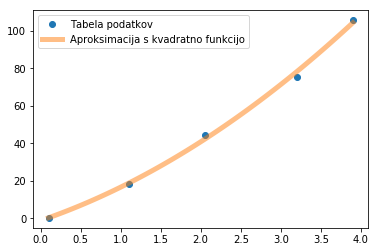

In [18]:
x_g = np.linspace(np.min(x), np.max(x), 100) # več točk za prikaz
plt.plot(x, y, 'o', label='Tabela podatkov')
plt.plot(x_g, apr_polinom(x_g), lw=5, alpha=0.5, label='Aproksimacija s kvadratno funkcijo')
plt.legend();

Poglejmo še napako aproksimacije:
$$e_i=y_i - f(x_i)$$

za $i=0,1,2,\dots,n-1$.

Pri pravilno izvedni aproksimaciji je nekaj $e_i$ pozitivnih in nekaj negativnih. Poglejmo, če je to res v našem primeru:

In [19]:
e = y - apr_polinom(x)
e

array([-0.06973553, -0.6315245 ,  2.13153872, -2.72869002,  1.29841133])

Opomba: višje stopnje polinom uporabimo, večja je verjetnost slabe pogojenosti. Iz tega razloga s stopnjo polinoma ne pretiravamo (v praksi uporabljamo predvsem nizke stopnje)!

## Uporaba `numpy` za aproksimacjo s polinomom

Pogljemo si kako uporabimo knjižnico `numpy` za polinomsko aproksimacijo. 

Najprej uporabimo funkcijo [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), ki zahteva tri parametre: `x`, `y` in `deg`. `x` in `y` predstavljata tabelo podatkov, `deg` pa stopnjo polinoma (za podrobnejši opis (npr. uporabe uteži pri aproksimaciji) glejte dokumentacijo funkcije). 

Funkcija `polyfit` vrne koeficiente polinoma (najprej za najvišji red).

Poglejmo si uporabo za predhodno obravnavani primer:

In [20]:
koef = np.polyfit(x, y, deg=2)
koef

array([  3.18393375,  14.64106847,  -1.22621065])

In [21]:
a # rezultat lastne implementacije

array([  3.18393375,  14.64106847,  -1.22621065])

Ko imamo koeficiente, lahko polinom definiramo s klicanjem objekta [poly1d](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html#numpy.poly1d), ki vrne instanco s pomočjo katere lahko izračunamo vrednosti v odvisnosti od `x` ali pa npr. izračunamo ničle.

Poglejmo si primer:

In [22]:
p = np.poly1d(koef) #p je instanca objekta poly1d

Izrišimo vrednosti

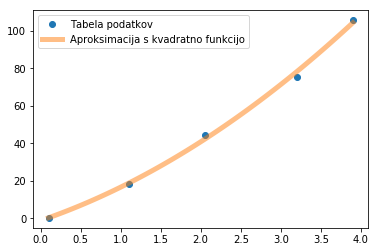

In [23]:
plt.plot(x, y, 'o', label='Tabela podatkov')
plt.plot(x_g, p(x_g), lw=5, alpha=0.5, label='Aproksimacija s kvadratno funkcijo')
plt.legend();

Izračunajmo ničle polinoma:

In [24]:
p.roots

array([-4.68070044,  0.08227923])

# Aproksimacija s poljubno funkcijo

Pri aproksimaciji nismo omejeni zgolj na polinomske funkcije. Tabele podatkov lahko aproksimiramo:
* z linearno kombinacijo linearno neodvisnih baznih funkcij ali 
* s funkcijo v kateri nastopajo parametri v nelinearni zvezi (npr. $a_0\,\sin(a_1\,x+a_2)$).

Za podrobnosti glejte vir J. Petrišič: Uvod v Matlab za inženirje, Fakulteta za strojništvo 2013, str 145. 

Tukaj se bomo osredotočili na uporabo `scipy` paketa za aproksimacijo z nelinearno fukcijo, ki temelji na metodi najmanjših kvadratov.

## Primer: aproksimacija s harmonsko funkcijo

Tabela podatkov je definira kot:

In [25]:
x = np.array([ 0.1, 0.8, 1.7, 2.5, 3.4, 4.2,  5.1])
y = np.array([ 0.01, -1.13, 0.02, 0.92, -0.01, -0.98, 0.1])

Prikažimo tabelo podatkov:

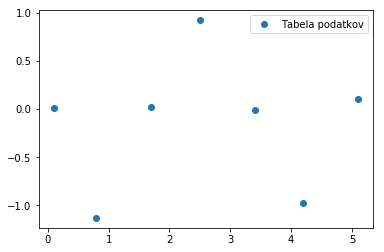

In [26]:
plt.plot(x, y, 'o', label='Tabela podatkov')
plt.legend();

Aprksimacijo z nelinearno funkcijo bomo izvedli s pomočjo [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Funkcija `curve_fit` zahteva tri parametre: `f, xdata, ydata`. `f` predstavlja definicijo pythom funkcije katere parametre spreminjamo z uporabo nelinearne metode najmanjših kvadratov. `xdata` in `ydata` predstavljata tabelo podatkov. Priporočeno je tudi, da definiramo približek iskanih parametrov `p0`.

Funkcija vrne dva parametra `popt`, ki predstavlja najdene parametre ter `pcov`, ki ocenjeno kovarianco `popt`.

Definirajmo najprej python funkcijo, katere prvi parameter je neodvisna spremenljivka `x`, nato pa sledijo parametri, katere želimo določiti:

In [27]:
def func(x, A, ω, ϕ):
    return A*np.sin(ω*x+ϕ)

Kjer je `A` amplitua,`ω` krožna frekvenca in `ϕ` faza harmonske funkcije. Iz slike lahko ugibamo prve približke: `A=1`, `ω=1`, `ϕ=0`

Sedaj uvozimo `curve_fit` in izvedemo optimizacijski postopek:

In [28]:
from scipy.optimize import curve_fit

In [29]:
popt, pcov = curve_fit(func, x, y, p0=[1, 1, 0])
popt

array([ 1.01461945,  1.89652046, -3.27943097])

Opazimo, da smo dobili pričakovane vrednosti (glejte zgoraj).

In [34]:
func(x, *popt)

array([-0.0525477 , -0.99608783, -0.05612665,  1.00860622, -0.02753942,
       -1.01426499,  0.1110182 ])

In [33]:
func(x, A_fit, w_fit, faza_fit)

array([-0.0525477 , -0.99608783, -0.05612665,  1.00860622, -0.02753942,
       -1.01426499,  0.1110182 ])

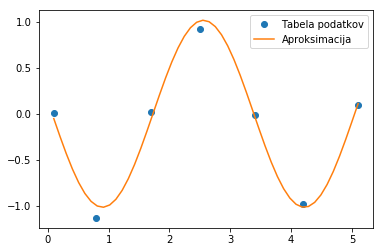

In [36]:
x_g = np.linspace(np.min(x), np.max(x), 50)
y_g = func(x_g, *popt) # bodi pozorni kako smo v funkcijo posredovali parametre
plt.plot(x, y, 'o', label='Tabela podatkov')
plt.plot(x_g, y_g, label='Aproksimacija')
plt.legend();

# Aproksimacija z zlepki in uporabo ``SciPy``

Tabela podatkov naj bo:

In [40]:
x = np.linspace(-3, 3, 20)
x

array([-3.        , -2.68421053, -2.36842105, -2.05263158, -1.73684211,
       -1.42105263, -1.10526316, -0.78947368, -0.47368421, -0.15789474,
        0.15789474,  0.47368421,  0.78947368,  1.10526316,  1.42105263,
        1.73684211,  2.05263158,  2.36842105,  2.68421053,  3.        ])

In [41]:
np.random.seed(0) # seme generatorja naključnih števil
y = np.exp(-x**2) + 0.1 * np.random.normal(scale=.5, size=len(x))

Poglejmo si objekt [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html), ki omogoča tako interpolacijo kot aproksimacijo z zlepki.

Aproksimacijo z zlepki izvedemo tako, da ob tabeli podatkov `x` in `y` definiramo še parameter `s`. Parameter `s` določa vrednost, ki je vsota kvadrata razlik aproksimacijskega zlepka in aproksimacijskih točk ne sme preseči:

``sum((w[i] * (y[i]-spl(x[i])))**2, axis=0) <= s``

`w` je utež.

Če definiramo `s=0`, zahtevamo interpolacijo. 

Parameter `k` definira stopnjo polinomskega zlepka (privzeto je `k=3`).

In [50]:
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(x, y, s=0.)

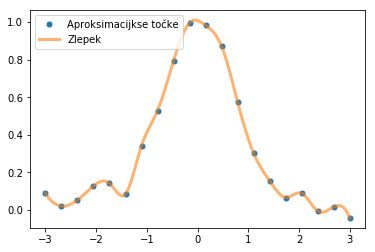

In [52]:
x_g = np.linspace(-3, 3, 100)
plt.plot(x, y, 'o', ms=5, label='Aproksimacijkse točke')
plt.plot(x_g, spl(x_g), lw=3, label='Zlepek', alpha=0.6)
plt.legend();

Izvedimo še aproksimacijo

In [66]:
spl_a = UnivariateSpline(x, y, s=.1)

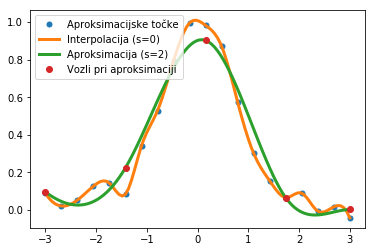

In [68]:
plt.plot(x, y, 'o', ms=5, label='Aproksimacijske točke')
plt.plot(x_g, spl(x_g), lw=3, label='Interpolacija (s=0)');
plt.plot(x_g, spl_a(x_g), lw=3, label='Aproksimacija (s=2)');
plt.plot(spl_a.get_knots(), spl_a(spl_a.get_knots()), 'o', label='Vozli pri aproksimaciji');
plt.legend();

Dejanski preostanek:

In [69]:
spl_a.get_residual()

0.0999987185545532

# Nekaj vprašanj za razmislek!


1. Podatki:
$$x = [-1.00, -0.50, 0.00, 0.50, 1.00]$$
$$y = [−1.00, −0.55, 0.00, 0.45, 1.00]$$
uporabite linearne zlepke in določite prvi odvod.
* Na zgornjih podatkih izračunajte linearno aproksimacijo ter določite parametra aproksimacije.
* Na nateznem testu ste testirali aluminijeve vzorce; rezultati testa so podani spodaj.

    Napetost [MPa]:
$$\sigma = [34.5, 69.0, 103.5, 138.0]$$

    Specifična deformacija [mm/m]
$$vzorec_1 = [0.46, 0.95, 1.48, 1.93]$$
$$vzorec_2 = [0.34, 1.02, 1.51, 2.09]$$
$$vzorec_3 = [0.37, 1.00, 1.51, 2.05]$$
    S pomočjo linearne aproksimacije določite elastični modul (napetost/specifična deformacija) vsakega posameznega vzorca.
* Za Al vzorce zgoraj linearno aproksimirajte elastični modul čez vse vzorce. Določite tudi standardno napako (glejte ``np.std``).
* Raziščite pomoč za funkcijo ``np.polyfit`` in utežite različne vzorce z različno utežjo (npr. da prvi meritvi zaupate manj). Izračunajte nato linearno aproksimiran elastični modul.
* Pojasnite bistvo metode najmanjših kvadratov na primeru linearne aproksimacije. 
* Podatki:
$$x = [1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7]$$
$$y = [6.008, 15.722, 27.130, 33.772, 5.257, 9.549, 11.098, 28.828$$
    Pripravite in pojasnite funkcijo za linearno aproksimacijo.
* Nadaljujte zgornjo nalogo in z vgrajeno funkcijo ``np.polyfit`` izvedite linearno, kvadratno in kubično polinomsko aproksimacijo. 
* Nadaljujte zgornjo nalogo in aproksimacije narišite ter določite standarno napako. Katera aproksimacija najbolje popiše podatke?
* Definirajte polinom 2. ali 3. stopnje. Dodajte šum (enakomeren ``np.random.rand`` ali normalen ``np.random.randn``) ter nato aproksimirajte s polinomom 1., 2. in 3. stopnje. Vse rezultate narišite in jih vrednotite.
* Podatke iz prejšnje točke aproksimirajte s pomočjo kubičnih zlepkov. Uporabite vgrajeno funkcijo in preučite vpliv parametra `s`.

# Dodatno

Naredite *exe* svojega programa:
* https://pypi.python.org/pypi/py2exe/
* http://pinm.ladisk.si/323/kako-iz-python-kodo-prevedem-v-exe-datoteko

Poglejte [pandas paket](http://pandas.pydata.org/)
<img src="http://pandas.pydata.org/_static/pandas_logo.png">